<a href="https://colab.research.google.com/github/Nicolaser1102/Introduccion-modelos-basados-en-arboles/blob/main/Tareas_Week6/Ejercicio_de_predicci%C3%B3n__de_precios_de__viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Montamos el drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import pandas as pd 
import numpy as np

In [6]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 2 /Week 2- Track 2/Deberes /Ejercicio de predicción de precios de viviendas/kc_house_data.csv'

df = pd.read_csv(nombrearchivo)
df.head() #Mostramos df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Base de datos tomada de: 
https://www.kaggle.com/harlfoxem/housesalesprediction

In [7]:
df.shape

(21613, 21)

#Limpieza de datos

In [9]:
#vemos si hay datos faltantes
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#vemos otra información en relación por las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Observamos que todos los tipos de datos están correctos de acuerdo a su formato

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Lo que puedo inferir es que las casas tienen diferentes características y no se dividen en un solo tipo de casa "normal" , por ejemplo: no tienen los mismos baños, ya que algunos llegan a tener hasta 8 y así mismo con las habitaciones que la máxima se encuentra en 33 habitaciones y la mínima se encuentran casas con 0 dormitorios, por lo que esa sería la principal razon de que existieran outliers

Ahora miraremos que columnas nos van a permitir hacer una regresión lineal

In [15]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


y como lo teníamos pensando, variables como 'ID' y 'Zipcode' nos dan una correlación negativa en torno a nuestro vector objetivo (precio) por lo que no vamos a tomar en cuenta para la regresión

Igualmente algunas variables como yr_built , long, condition , sqft_lot tienen correlación muy cercanas a 0 pero de acuerdo a https://blog.ion.com.mx/que-factores-influyen-en-el-precio-de-mi-casa 

Los factores principales son:
- Año de construcción (yr_built) en conjunto con la condición de la casa (condition).
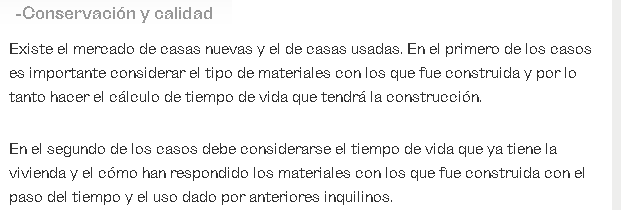


-Así mismo en la misma página consideran que el tamaño en pies cuadrados (sqft_lot) y altura de la casa (long) es importante.

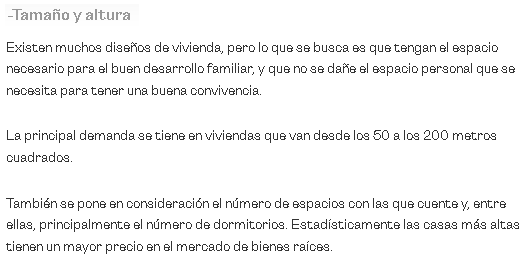


Y por esta razón no podríamos eliminarlas o no tomarlas en cuenta

En conclusión haremos nuestro modelo con todo el data frame tomando en cuenta:

- Columnas 'ID','Zip Code' y 'Fecha' no se tomarán en cuenta para la matriz de características (X) 

Nota: La fecha no se toma en cuenta ya que al ser una variable de tipo objeto no tiene correlación con la columna 'precio'
- Nuestro vector objetivo es la columna price (y)

# Tarea 

-  Tu tarea es realizar bagged trees y técnicas de regresión forestal aleatoria en el conjunto de datos para predecir el precio a partir de sus características.

# Árboles de decisión 

Se realizará un árbol decisión enfatizando el proceso final en obtener el mejor max_depth (hyperparámetro de DecisionTreeClassifier) para tener el mayor puntaje R2 para el arbol de decisión  

In [29]:
#importamos librerías que necesitaremos 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #librería para division de entrenamiento y prueba 
from sklearn.tree import DecisionTreeRegressor # librería árboles de decisión 

Primero empezaremos a separar nuestros datos en variables independientes (X) y variable dependiente (y)

In [27]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [36]:
#Valores en X
X = df.drop(['id','zipcode','price','date'], axis=1)
X.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650


Código inspirado de: https://www.analyticslane.com/2019/03/25/como-eliminar-columnas-y-filas-en-un-dataframe-pandas/

In [37]:
X.shape

(21613, 17)

In [108]:
#valores en y 
y = df['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [106]:
y.shape

(21613,)

In [39]:
decision_tree= DecisionTreeRegressor(max_depth=5,random_state= 0) #instanciamos el modelo y añadimos 
                                                                  # que el árbol tenga una profundidad de 5
                                                                  #una "semilla" para poder replicar el modelo

In [40]:
decision_tree

DecisionTreeRegressor(max_depth=5, random_state=0)

Dividimos nuestros datos en conjuntos de prueba y entrenamiento

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
decision_tree.fit(X_train,y_train) #entrenamos nuestro modelo

DecisionTreeRegressor(max_depth=5, random_state=0)

In [44]:
score = decision_tree.score(X_test, y_test) #puntuamos según r2 a nuestro modelo
score

0.7272059336793868

Nuestro modelo tiene un buen puntaje r2 pero podemos hacer que se pueda mejorar más "jugando" con el máximo de profundidad del árbol de decisión 

## Buscar el valor óptimo de profundidad del árbol de decisión

In [71]:
md_optimo =list(range(1,15))
md_optimo #lista de los diferentes max_depth a probar

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [72]:
scores_md = [] #inicializamos una lista que contendrá los valores de cada puntaje

In [73]:
for md in md_optimo:
  decision_tree_a = DecisionTreeRegressor(max_depth = md, 
                             random_state = 0)
  decision_tree_a.fit(X_train, y_train)
  score_a = decision_tree_a.score(X_test, y_test)
  scores_md.append(score_a)
   
print (scores_md)

[0.3300587561627514, 0.4816422997433065, 0.5883789021735926, 0.671448768509469, 0.7272059336793868, 0.7733558833845349, 0.8018138707243891, 0.7967501848112946, 0.8020470517362714, 0.8027258148204545, 0.7843181149450155, 0.7846842988849745, 0.7799417082544632, 0.7722592036563234]


Para visualizarlo de una mejor manera crearemos un 'lineplot' 

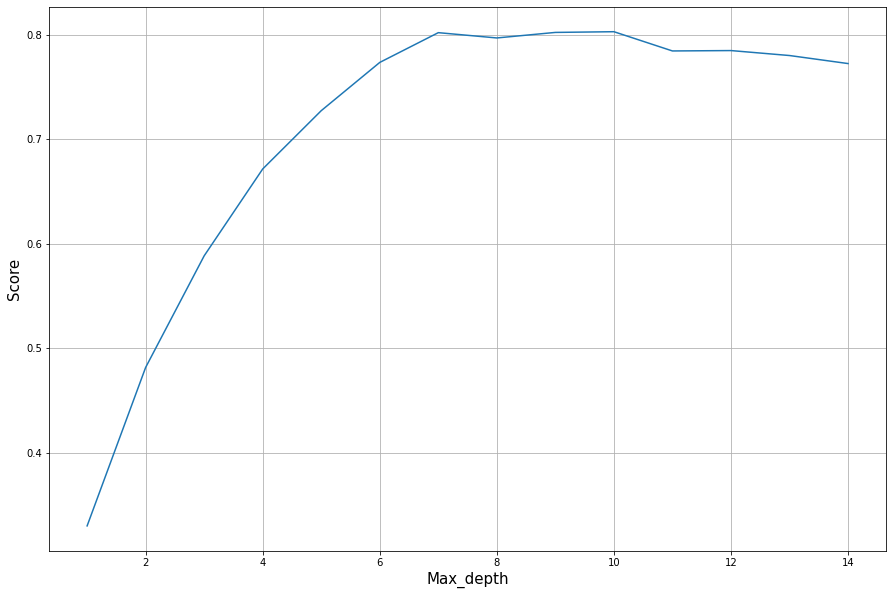

In [74]:
plt.figure(figsize=(15,10))
plt.plot(md_optimo,scores_md)

#personalizamos un poco el gráfico
plt.grid()
plt.xlabel("Max_depth", fontsize= 15)
plt.ylabel("Score", fontsize= 15)
pass

Y visualizamos que con una profundidad de 7 u 10 se alcanza el máximo puntaje R2 por lo que por buena práctica se elije el modelo menos complicado, se eligirá la profundidad máxima de "7" 

In [83]:
decision_tree= DecisionTreeRegressor(max_depth=7,random_state= 0) 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [85]:
decision_tree.fit(X_train,y_train) #entrenamos nuestro modelo

DecisionTreeRegressor(max_depth=7, random_state=0)

In [86]:
score = decision_tree.score(X_test, y_test) #puntuamos según r2 a nuestro modelo
score

0.8018138707243891

Listo, nuestro modelo de **arbol de decisión** tiene un buen puntaje de 0.80

Códigos inspirados de: Coding Dojo

#Bagging Tree

Se usará un modelo de 'Bagged Trees' para predecir el precio de la vivienda de acuerdo a sus características 

In [93]:
import sklearn
#importamos la librerías que necesitamos
from sklearn.ensemble import BaggingRegressor

In [88]:
bagged_tree = BaggingRegressor() #instanciamos el modelo

In [89]:
bagged_tree.fit(X_train,y_train)

BaggingRegressor()

In [91]:
score = bagged_tree.score(X_test, y_test)
score

0.8761766353798527

En este caso nuestro modelo mejoró bastante en relación con el modelo de 'Árbol de decisión' teniendo un puntaje casi 7 puntos mayor.

Código inspirado de:
- Coding Dojo
- https://www.youtube.com/watch?v=n97h0EE90qE

#Random forests

Se aplicará la técnica de random forest para predecir el precio de la vivienda de acuerdo a sus características

In [95]:
#importamos librería para random forest 
from sklearn.ensemble import RandomForestRegressor

In [97]:
#instanciamos el modelo
random_forest_model = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True) #todos estos valores ya están incluidos por defecto

In [98]:
#entrenamos el modelo
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [99]:
#puntuamos el modelo
score = random_forest_model.score(X_test, y_test)
score

0.8890775575030008

Lo mejoramos en casi un punto lo cual,nos hace inferir que nuestro random forest es el mejor modelo para predecir los precios de vivienda.

### Error de generalización (out-of-sample error) del modelo

In [111]:
random_forest_model.oob_score_

0.8663719841687575

Podemos interpretar que el error de generalización no cambia mucho en relación a partir del puntaje R2 por lo que se infiere que los datos están bastante equilibrados 

Ahora, como "personalización" de nuestro modelo de random forest vamos a buscar cual de n_estimators (hyper parametro de random forest) puede ser el ideal para maximizar nuestro puntaje

In [116]:
#creamos una lista con los diferentes valores que va a tomar n_estimators en el modelo
estimators_lista = list(range(10,300,10))
print (estimators_lista)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]


In [118]:
scores_rf = [] #se crea una lista donde se pondrán los valores de R2 

for estimator_num in estimators_lista:
    Random_forest_a = RandomForestRegressor(n_estimators=estimator_num,
                                 random_state=0,
                                 bootstrap=True)
    Random_forest_a.fit(X_train, y_train)
    scores_rf.append(Random_forest_a.score(X_test, y_test))

In [119]:
scores_rf

[0.8738598358827292,
 0.8870775104967299,
 0.8893700594499284,
 0.8889556049332134,
 0.8898058600858179,
 0.8905992373067387,
 0.8906786342258258,
 0.8904229527426203,
 0.8907766793157823,
 0.890298009977329,
 0.8897574491988065,
 0.8902984192599417,
 0.8900846933321007,
 0.8902332827717062,
 0.8904999850588647,
 0.8906739963966797,
 0.8907332526304833,
 0.8910867925981408,
 0.8908240593740736,
 0.8907341076849219,
 0.8908182869059548,
 0.8903387856569378,
 0.8904490698263388,
 0.8901212264047929,
 0.889654644703201,
 0.8899076235766936,
 0.8903587689305114,
 0.890291608015254,
 0.8901919486945026]

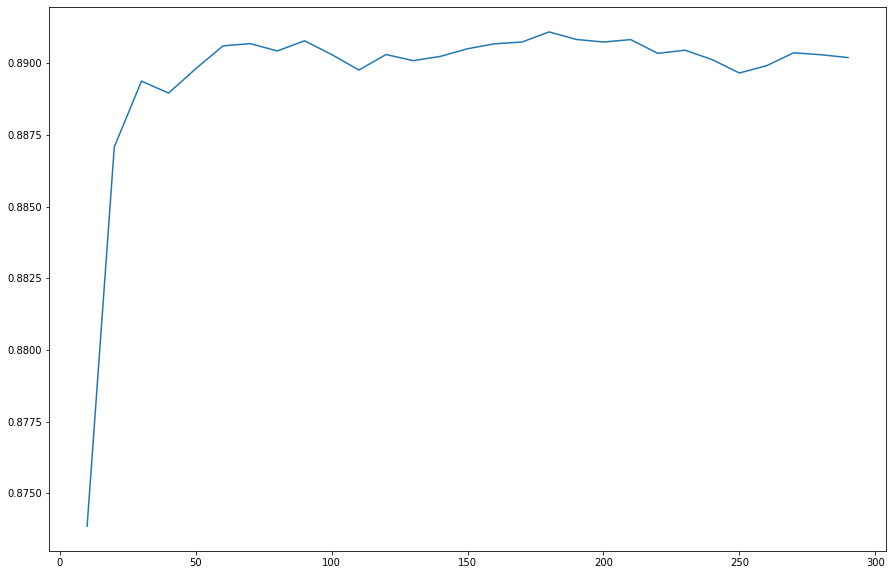

In [120]:
plt.figure(figsize = (15,10))
plt.plot(estimators_lista,scores_rf)

Se mira que se alcanza casi un 90% con algunos n_estimators

Buscamos el n_estimators óptimo para obtener el mejor puntaje R2 para el modelo

In [128]:
maximo = max(scores_rf)
maximo

0.8910867925981408

In [129]:
scores_rf.index(maximo)

17

In [130]:
estimators_lista[17]

180

Por lo que para obtener el máximo de precisión para predecir el precio de la vivienda de acuerdo a sus características es:
- Realizar un modelo de Random Forest (regresión) con hyperparámetros por default a excepción de n_Estimators , que se lo debe colocar un valor de 180 para obtener un puntaje R2 de 0.89

Código inspirado de: Coding Dojo

# Preguntas para pensar y responder

Una vez que hayas completado la tarea, responde las siguientes preguntas.

¿Cuáles son las características más importantes de tu modelo?
- Que se lo realizo mediante una base de datos muy completa,y que no se requirió hacer uso de varios procesos de manipulación o limpieza de datos
-Al usarse varios algoritmos un poco más complejos comparados con los vistos anteriormente (KNN, regresión lineal) podemos tener un puntaje R2 más alto.
- Al tener un puntaje alto, se pudo obtener un modelo relativamente bueno.  

¿Qué otros parámetros podrías haber intentado ajustar?
- En el modelo de árbol de decisión modificar otros valores como 'min_samples_split' o 'min_samples_leaf'
para llegar a optimizar el modelo
- En bagged tree y random forest se podrían haber modificado parámetros como: 'max_depth','max_features','max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split',etc.